## Arthur Kim's Notebook

In [1]:
pwd

'/Users/arthur/Documents/Flatiron/phase_2/Project/dsc-phase-2-project/individual_notebook'

In [2]:
cd ..

/Users/arthur/Documents/Flatiron/phase_2/Project/dsc-phase-2-project


In [3]:
#import appropriate libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
pd.set_option('display.max_columns', None)
%matplotlib inline

In [4]:
#read in the file
df = pd.read_csv('data/kc_house_data.csv')

In [5]:
#check the first 5 entries in the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
#check the columns and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
#drop id
df.drop(columns=['id'], inplace=True)

In [16]:
#clean up sqft_basement and convert to int
df['sqft_basement'] = df['sqft_basement'].replace({'?':np.nan}).astype(float)

TypeError: Cannot compare types 'ndarray(dtype=float64)' and 'str'

In [9]:
#ratio of SQFT compared to neighbors
df['sqft_living_ratio'] = df['sqft_living'] / df['sqft_living15']
df['sqft_lot_ratio'] = df['sqft_lot'] / df['sqft_lot15']
df['sqft_liv_lot_ratio'] = (df['sqft_lot']+df['sqft_living']) / (df['sqft_lot15']+df['sqft_living15'])

In [10]:
#drop na for waterfront, view, and yr_renovated
df.dropna(subset=['waterfront'], inplace=True)
df.dropna(subset=['view'], inplace=True)
df.dropna(subset=['yr_renovated'], inplace=True)
df.dropna(subset=['sqft_basement'], inplace=True)

In [11]:
#retrieve the months
df['month_of_date'] = pd.DatetimeIndex(df['date']).month
df.drop(columns=['date'], inplace=True)

In [12]:
#convert waterfront and view into int
df['view'] = df['view'].astype(int)
df['waterfront'] = df['waterfront'].astype(int)

In [13]:
df.reset_index(inplace=True, drop=True)

In [14]:
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15429 entries, 0 to 15428
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               15429 non-null  float64
 1   bedrooms            15429 non-null  int64  
 2   bathrooms           15429 non-null  float64
 3   sqft_living         15429 non-null  int64  
 4   sqft_lot            15429 non-null  int64  
 5   floors              15429 non-null  float64
 6   waterfront          15429 non-null  int64  
 7   view                15429 non-null  int64  
 8   condition           15429 non-null  int64  
 9   grade               15429 non-null  int64  
 10  sqft_above          15429 non-null  int64  
 11  sqft_basement       15429 non-null  float64
 12  yr_built            15429 non-null  int64  
 13  yr_renovated        15429 non-null  float64
 14  zipcode             15429 non-null  int64  
 15  lat                 15429 non-null  float64
 16  long

In [14]:
#df.hist(figsize=(18,15), bins='auto');

In [15]:
#create log price column
df['price_log'] = np.log(df['price'])

## Outliers

<AxesSubplot:>

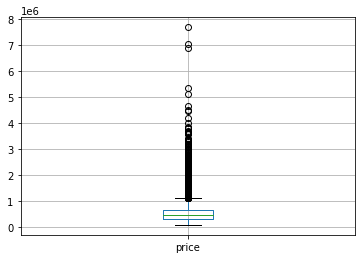

In [16]:
df.boxplot(column=['price'])

In [17]:
print('mean:', df['price'].mean())
print('median:', df['price'].median())
print('max:', df['price'].max())
print('min:', df['price'].min())
print('std:', df['price'].std())
print('25% quartile:', df['price'].quantile(0.25))
print('75% quartile:', df['price'].quantile(0.75))

mean: 541497.7825523365
median: 450000.0
max: 7700000.0
min: 82000.0
std: 373021.9469139042
25% quartile: 320000.0
75% quartile: 643500.0


In [18]:
#determining IQR for raw price
iqr = df['price'].quantile(0.75) - df['price'].quantile(0.25)
outlier_above = df[df['price'] > df['price'].quantile(0.75) + 1.5*iqr].price.count()
outlier_below = df[df['price'] < df['price'].quantile(0.25) - 1.5*iqr].price.count()
print('# of outliers above:', outlier_above)
print('# of outliers below:', outlier_below)

# of outliers above: 831
# of outliers below: 0


In [19]:
#determining IQR for log price
log_iqr = df['price_log'].quantile(0.75) - df['price_log'].quantile(0.25)
outlier_above = df[df['price_log'] > df['price_log'].quantile(0.75) + 1.5*log_iqr].price.count()
outlier_below = df[df['price_log'] < df['price_log'].quantile(0.25) - 1.5*log_iqr].price.count()
print('# of outliers above:', outlier_above)
print('# of outliers below:', outlier_below)

# of outliers above: 203
# of outliers below: 34


In [20]:
#remove price outliers
#df = df[(df['price'] < df['price'].quantile(0.75) + 1.5*iqr) | (df['price'] > df['price'].quantile(0.25) - 1.5*iqr)]

#remove log price outliers
#df = df[(df['price_log'] < df['price_log'].quantile(0.75) + 1.5*log_iqr) | (df['price_log'] > df['price_log'].quantile(0.25) - 1.5*log_iqr)]

In [21]:
#df.price.hist(figsize=(6,6), bins='auto');

## Finding Correlation

In [22]:
#sns.pairplot(df)

In [23]:
df.corr()['price'].map(abs).sort_values(ascending=False)

price                 1.000000
price_log             0.888093
sqft_living           0.706498
grade                 0.664356
sqft_above            0.612374
sqft_living15         0.583400
bathrooms             0.525655
view                  0.397786
sqft_basement         0.320053
lat                   0.306991
bedrooms              0.305792
sqft_living_ratio     0.305293
waterfront            0.275718
floors                0.260143
yr_renovated          0.120981
sqft_lot              0.084687
sqft_lot15            0.080569
sqft_liv_lot_ratio    0.055295
yr_built              0.050528
zipcode               0.049371
sqft_lot_ratio        0.039549
condition             0.033172
long                  0.021948
month_of_date         0.008817
Name: price, dtype: float64

In [24]:
#numeric: bedrooms, bathrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, 
#         yr_built, yr_renovated, sqft_living, sqft_lot15, sqft_total, sqft_living_ratio
#         sqft_lot_ratio, sqft_liv_lot_ratio, lat, long
#catgorical: floors, waterfront, view, condition, grade, month_of_date, zipcode

In [25]:
#check column names
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_living_ratio', 'sqft_lot_ratio',
       'sqft_liv_lot_ratio', 'month_of_date', 'price_log'],
      dtype='object')

In [26]:
#here is where we drop depending what we want
# df.drop(columns=['bedrooms'], inplace=True)
# df.drop(columns=['bathrooms'], inplace=True)
#df.drop(columns=['sqft_living'], inplace=True)
# df.drop(columns=['sqft_lot'], inplace=True)
# df.drop(columns=['floors'], inplace=True)
# df.drop(columns=['waterfront'], inplace=True)
# df.drop(columns=['view'], inplace=True)
# df.drop(columns=['condition'], inplace=True)
# df.drop(columns=['grade'], inplace=True)
# df.drop(columns=['sqft_above'], inplace=True)
# df.drop(columns=['sqft_basement'], inplace=True)
# df.drop(columns=['yr_built'], inplace=True)
# df.drop(columns=['yr_renovated'], inplace=True)
# df.drop(columns=['zipcode'], inplace=True)
# df.drop(columns=['lat'], inplace=True)
# df.drop(columns=['long'], inplace=True)
# df.drop(columns=['sqft_living15'], inplace=True)
# df.drop(columns=['sqft_lot15'], inplace=True)
# df.drop(columns=['sqft_total'], inplace=True)
# df.drop(columns=['sqft_living_ratio'], inplace=True)
# df.drop(columns=['sqft_lot_ratio'], inplace=True)
# df.drop(columns=['sqft_liv_lot_ratio'], inplace=True)
# df.drop(columns=['month_of_date'], inplace=True)

In [27]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_living_ratio', 'sqft_lot_ratio',
       'sqft_liv_lot_ratio', 'month_of_date', 'price_log'],
      dtype='object')

In [28]:
#dummying categorical 
df = pd.get_dummies(df, prefix='floors', prefix_sep='_', columns=['floors'], drop_first = True)
df = pd.get_dummies(df, prefix='waterfront', prefix_sep='_', columns=['waterfront'], drop_first = True)
df = pd.get_dummies(df, prefix='view', prefix_sep='_', columns=['view'], drop_first = True)
df = pd.get_dummies(df, prefix='condition', prefix_sep='_', columns=['condition'], drop_first = True)
df = pd.get_dummies(df, prefix='grade', prefix_sep='_', columns=['grade'], drop_first = True)
df = pd.get_dummies(df, prefix='month', prefix_sep='_', columns=['month_of_date'], drop_first = True)
#df = pd.get_dummies(df, prefix='zipcode', prefix_sep='_', columns=['zipcode'], drop_first = True)

In [29]:
#rename the floor column heads
df.rename(columns={'floors_1.5': 'floors_1_5', 'floors_2.0': 'floors_2', 'floors_2.5': 'floors_2_5', 'floors_3.0': 'floors_3', 'floors_3.5': 'floors_3_5'}, inplace=True)

## Recursive Feature Elimination

In [30]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=10)

In [31]:
ss = StandardScaler()
ss.fit(df.drop(['price', 'price_log'], axis=1))

df_scaled = ss.transform(df.drop(['price', 'price_log'], axis=1))

In [32]:
select.fit(X=df_scaled, y=df['price'])

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [33]:
select.support_

array([False,  True,  True, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False])

In [34]:
true_indexes = [i for i, x in enumerate(select.support_) if x]

In [35]:
key_columns = []
for i in true_indexes:
    key_columns.append(df.drop(['price', 'price_log'], axis=1).columns[i])

key_columns

['bathrooms',
 'sqft_living',
 'yr_built',
 'lat',
 'waterfront_1',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13']

In [36]:
select.fit(X=df_scaled, y=df['price_log'])

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [37]:
select.support_

array([False,  True,  True, False, False, False,  True, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [38]:
log_true_indexes = [i for i, x in enumerate(select.support_) if x]

In [39]:
log_key_columns = []
for i in log_true_indexes:
    log_key_columns.append(df.drop(['price', 'price_log'], axis=1).columns[i])
    
log_key_columns

['bathrooms',
 'sqft_living',
 'yr_built',
 'lat',
 'sqft_living15',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_6',
 'grade_7']

## OLS TIME!

In [40]:
#set target
target = 'price'
log_target = 'price_log'

In [41]:
#set columns
#columns = "+".join(df.columns.drop([target,log_target]))
columns = "+".join(key_columns)

In [42]:
#set formula
formula = target + '~' +columns

In [43]:
model = ols(formula, df).fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     3637.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:23:45   Log-Likelihood:            -2.1049e+05
No. Observations:               15429   AIC:                         4.210e+05
Df Residuals:                   15418   BIC:                         4.211e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2.412e+07   6.14e+05    -39.259      0.000   -2.53e+07   -2.29e+07
bathrooms     6.399e+04   3613.018     17.711      0.000    5.69e+04    7.11e+04
sqft_living    156.5531      3.297     47.483      0.000     150.091     163.016
yr_built     -2378.3224     67.534    -35.216      0.000   -2510.698   -2245.947
lat           6.061e+05   1.21e+04     50.096      0.000    5.82e+05     6.3e+05
waterfront_1   7.92e+05   1.92e+04     41.261      0.000    7.54e+05     8.3e+05
grade_9       1.577e+05   5789.970     27.239      0.000    1.46e+05    1.69e+05
grade_10      3.177e+05   8583.079     37.014      0.000    3.01e+05    3.35e+05
grade_11      5.223e+05   1.38e+04     37.731      0.000    4.95e+05    5.49e+05
grade_12      1.042e+06   2.69e+04     38.760      0.000    9.89e+05    1.09e+06
grade_13      2.119e+06   6.29e+04     33.661      0.000       2e+06    2.24e+06
==============================================================================
Omnibus:                     9847.414   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           434119.607
Skew:                           2.464   Prob(JB):                         0.00
Kurtosis:                      28.515   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
#set formula for Log
log_columns = "+".join(log_key_columns)
formula = log_target + '~' + log_columns
model = ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     4046.
Date:                Mon, 12 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:23:45   Log-Likelihood:                -2063.5
No. Observations:               15429   AIC:                             4149.
Df Residuals:                   15418   BIC:                             4233.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -49.0532      0.857    -57.211      0.000     -50.734     -47.373
bathrooms         0.0847      0.005     16.942      0.000       0.075       0.094
sqft_living       0.0002   4.74e-06     46.250      0.000       0.000       0.000
yr_built         -0.0033      0.000    -32.239      0.000      -0.003      -0.003
lat               1.4199      0.017     85.451      0.000       1.387       1.452
sqft_living15     0.0001   5.16e-06     28.817      0.000       0.000       0.000
condition_3       0.1723      0.023      7.365      0.000       0.126       0.218
condition_4       0.2133      0.023      9.081      0.000       0.167       0.259
condition_5       0.2727      0.024     11.162      0.000       0.225       0.321
grade_6          -0.3034      0.010    -31.187      0.000      -0.322      -0.284
grade_7          -0.1785      0.006    -31.103      0.000      -0.190      -0.167
==============================================================================
Omnibus:                      375.561   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              871.339
Skew:                           0.062   Prob(JB):                    6.18e-190
Kurtosis:                       4.158   Cond. No.                     1.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Cross Validation

In [46]:
X = df.drop(['price','price_log'], axis = 1)
y = df['price']
y_log = df['price_log']

X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train2, X_test1, y_log_train, y_log_test = train_test_split(X, y_log, test_size=0.20)

In [47]:
baseline_model = LinearRegression()
log_model = LinearRegression()

In [48]:
splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

In [49]:
baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train1,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.7379637430007989
Validation score: 0.7111171305348666


In [50]:
log_scores = cross_validate(
    estimator=log_model,
    X=X_train2,
    y=y_log_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", log_scores["train_score"].mean())
print("Validation score:", log_scores["test_score"].mean())

Train score:      0.7754869300724906
Validation score: 0.7751023137355421
